<a href="https://colab.research.google.com/github/ikrarmuhamad/Telco-Customer-Churn/blob/main/Telco_churn_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning

##Import dataset and Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Initial EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/telco.csv', sep = ';')

In [ ]:
df.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [ ]:
df.tail()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,4472-LVYGI,Germany,Female,0,Yes,Yes,2,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Yes,Bank transfer (automatic),52.55,,No
7039,1371-DWPAZ,Germany,Female,0,Yes,Yes,2,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,No,Credit card (automatic),56.05,,No
7040,2775-SEFEE,Germany,Male,0,No,Yes,3,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Yes,Bank transfer (automatic),61.90,,No
7041,4075-WKNIU,Germany,Female,0,Yes,Yes,3,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,No,Mailed check,73.35,,No
7042,5709-LVOEQ,Germany,Female,0,Yes,Yes,3,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,No,Mailed check,80.85,,No


In [ ]:
df.sample(10)

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1498,8640-SDGKB,Germany,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,Yes,Electronic check,74.40,299.7,Yes
4959,8818-XYFCQ,Germany,Male,0,Yes,Yes,32,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Yes,Credit card (automatic),99.55,3204.65,Yes
625,0031-PVLZI,Germany,Female,0,Yes,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,20.35,76.35,Yes
573,9747-DDZOS,Germany,Female,0,No,No,1,Yes,No,Fiber optic,...,No,Yes,No,No,No,No,Bank transfer (automatic),73.50,73.5,Yes
2922,5348-CAGXB,Germany,Male,0,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,Yes,Electronic check,89.55,1021.75,No
784,9929-PLVPA,Germany,Female,0,No,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Credit card (automatic),20.40,94.5,No
6040,1658-XUHBX,Germany,Female,1,Yes,Yes,59,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Yes,Credit card (automatic),88.75,5348.65,No
5431,2474-BRUCM,Germany,Male,1,Yes,No,40,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,No,Electronic check,101.85,4086.3,Yes
2027,5605-IYGFG,Germany,Female,0,No,No,7,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),69.85,515.45,No
335,4236-UJPWO,Germany,Female,0,No,No,2,No,No phone service,DSL,...,No,No,No,No,No,No,Electronic check,24.50,46.4,No


In [ ]:
df.shape

(7043, 21)

##Drop Duplicate data

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.nunique()

customerid          7043
region                 3
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                74
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
paperlessbilling       2
paymentmethod          4
monthlycharges      1587
totalcharges        6533
churn                  2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


##Handling inconsistent dtypes

In [ ]:
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)
df['totalcharges'] = df['totalcharges'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


##Handling missing value

In [ ]:
df.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [ ]:
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())

let's check again missing value

In [ ]:
df.isna().sum()

customerid          0
region              0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

great!!, data has no missing value

In [ ]:
df.sample(5)

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3342,0396-UKGAI,Germany,Male,0,No,Yes,23,Yes,No,DSL,...,Yes,No,Yes,No,No,Yes,Bank transfer (automatic),55.30,1284.20,No
224,1740-CSDJP,Germany,Male,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Yes,Yes,Bank transfer (automatic),35.25,35.25,Yes
4730,2338-BQEZT,Germany,Female,0,No,No,55,Yes,No,DSL,...,No,No,No,No,No,Yes,Credit card (automatic),50.55,2832.75,No
5703,3115-JPJDD,Germany,Female,0,Yes,No,59,Yes,No,Fiber optic,...,No,Yes,No,No,No,Yes,Credit card (automatic),81.25,4639.45,No
5525,3537-HPKQT,Germany,Female,0,Yes,No,55,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Yes,Credit card (automatic),77.75,4266.40,No


##Handling inconsistent data

In [ ]:
df.sample(5)

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4953,2669-QVCRG,Germany,Female,0,No,No,41,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Credit card (automatic),81.30,3190.65,No
6586,9938-TKDGL,Germany,Male,0,Yes,Yes,68,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Yes,Electronic check,99.55,6668.00,No
6507,1642-HMARX,Germany,Female,0,Yes,No,68,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,91.70,6424.70,No
3556,6087-MVHJH,Germany,Female,0,No,No,16,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Yes,Electronic check,88.45,1422.10,Yes
398,8909-BOLNL,Germany,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,21.20,52.05,No


In [ ]:
col_1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
for i in col_1:
  df[i] = df[i].str.strip()
  df[i] = df[i].replace({'No internet service' : 'No'})

col_2 = ['multiplelines']
for i in col_2:
  df[i] = df[i].str.strip()
  df[i] = df[i].replace({'No phone service' : 'No'})

In [ ]:
df.sample(5)

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3172,3498-LZGQZ,Germany,Male,0,Yes,Yes,63,Yes,No,No,...,No,No,No,No,No,Yes,Mailed check,19.15,1177.05,No
3536,8490-BXHEO,Germany,Male,1,No,No,18,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Yes,Credit card (automatic),80.55,1411.65,No
5126,7054-DMVAS,Germany,Male,0,No,No,54,Yes,No,DSL,...,Yes,No,No,Yes,No,Yes,Bank transfer (automatic),65.30,3512.90,No
2623,7206-PQBBZ,Germany,Male,1,Yes,No,11,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,70.20,834.70,No
3934,0121-SNYRK,Germany,Male,0,No,No,50,No,No,DSL,...,No,No,Yes,No,No,Yes,Mailed check,35.40,1748.90,No


##Check outlier



In [ ]:
cat = df.dtypes[df.dtypes == 'object'].keys().tolist()
num = [x for x in df.columns if x not in cat ]

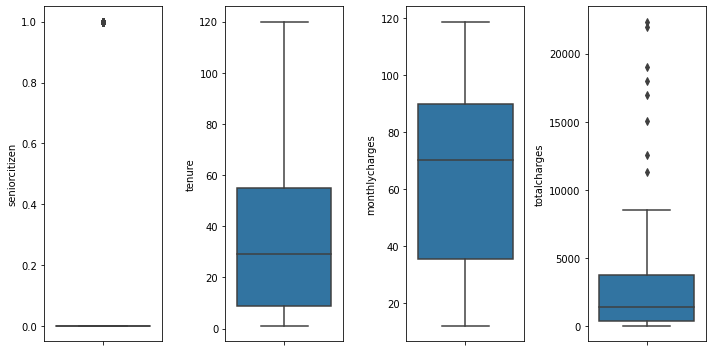

In [ ]:
plt.figure(figsize = (10, 5))
for i in range (len(num)):
  plt.subplot(1, len(num), i+1)
  sns.boxplot(y = df[num[i]])
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

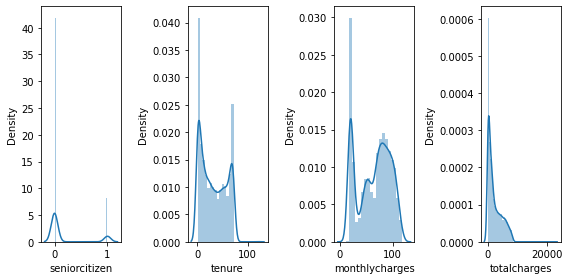

In [ ]:
plt.figure(figsize = (8, 4))
for i in range (len(num)):
  plt.subplot(1, len(num), i+1)
  sns.distplot(df[num[i]])
  plt.tight_layout()

In [ ]:
df['totalcharges'].describe()

count     7043.000000
mean      2292.875264
std       2315.221897
min         12.000000
25%        402.225000
50%       1397.475000
75%       3793.050000
max      22345.600000
Name: totalcharges, dtype: float64

##Standadization

In [ ]:
def standardized(x):
  a = (x - x.mean())/x.std()
  return (a)

In [ ]:
df['monthlycharges'].describe()

count    7043.000000
mean       64.751874
std        30.097858
min        12.000000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

In [ ]:
standardized(df['monthlycharges'])

0      -1.752679
1      -1.719454
2      -1.526749
3      -1.525088
4      -1.525088
          ...   
7038   -0.405407
7039   -0.289119
7040   -0.094753
7041    0.285672
7042    0.534860
Name: monthlycharges, Length: 7043, dtype: float64

In [ ]:
standardized(df['monthlycharges']).describe()

count    7.043000e+03
mean    -2.255457e-15
std      1.000000e+00
min     -1.752679e+00
25%     -9.718922e-01
50%      1.859975e-01
75%      8.338841e-01
max      1.794085e+00
Name: monthlycharges, dtype: float64

In [ ]:
standardized(df['tenure']).describe()

count    7.043000e+03
mean    -1.433217e-16
std      1.000000e+00
min     -1.276113e+00
25%     -9.509998e-01
50%     -1.382179e-01
75%      9.183985e-01
max      3.559940e+00
Name: tenure, dtype: float64

In [ ]:
standardized(df['totalcharges']).describe()

count    7.043000e+03
mean    -5.290860e-16
std      1.000000e+00
min     -9.851649e-01
25%     -8.166173e-01
50%     -3.867449e-01
75%      6.479615e-01
max      8.661254e+00
Name: totalcharges, dtype: float64

##MinMax

In [ ]:
def minmax(y) :
  b = (y - y.min())/(y.max() - y.min())
  return(b)

In [ ]:
minmax(df['totalcharges']).describe()

count    7043.000000
mean        0.102128
std         0.103665
min         0.000000
25%         0.017473
50%         0.062035
75%         0.169299
max         1.000000
Name: totalcharges, dtype: float64

In [ ]:
minmax(df['tenure']).describe()

count    7043.000000
mean        0.263875
std         0.206780
min         0.000000
25%         0.067227
50%         0.235294
75%         0.453782
max         1.000000
Name: tenure, dtype: float64

In [ ]:
minmax(df['monthlycharges']).describe()

count    7043.000000
mean        0.494163
std         0.281947
min         0.000000
25%         0.220141
50%         0.546604
75%         0.729274
max         1.000000
Name: monthlycharges, dtype: float64

#Encoding for Target Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['churn'] = le.fit_transform(df['churn'])

#Business Understanding

##Berapa jumlah pengguna yang churn dan tidak churn?

Text(0.5, 1.0, 'Percent of Churn')

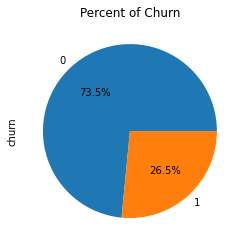

In [ ]:
df['churn'].value_counts(True).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Percent of Churn')

##Dari golongan usia manakah pelanggan yang melakukan churn Berdasarkan customer id?

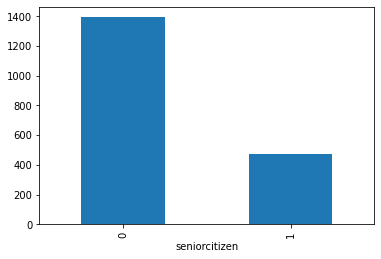

In [ ]:
df[df['churn'] == 1].groupby('seniorcitizen')['customerid'].count().sort_values(ascending = False).plot(kind = 'bar')

Sebagian besar, pelanggan yang churn bukanlah pelanggan yang lanjut usia. Dalam artian, pelanggan yang churn adalah pelanggan yang berusia muda.

##Berapa banyak biaya bulanan yang dimiliki oleh pelanggan yang churn?

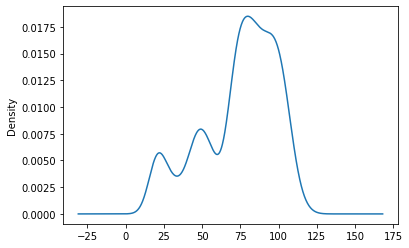

In [ ]:
df[df['churn'] == 1].groupby('customerid')['monthlycharges'].sum().sort_values(ascending = False).plot(kind = 'density')

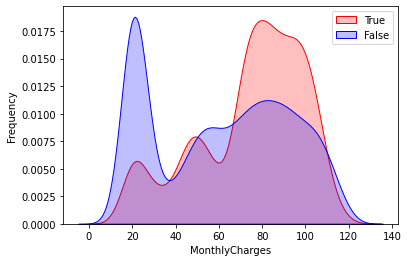

In [ ]:
mc = sns.kdeplot(df['monthlycharges'][(df['churn'] == True)], color = 'Red', shade = True)
mc = sns.kdeplot(df['monthlycharges'][(df['churn'] == False)], ax = mc, color = 'Blue', shade = True)
mc.set_xlabel('MonthlyCharges')
mc.set_ylabel('Frequency')
plt.legend([True, False])

Tunggakan untuk pelanggan yang churn sebagian besar berada di kisaran 70 - 120

##Berapa bulan waktu yang dihabiskan pelanggan churn berada di company?

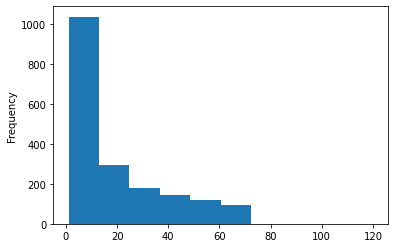

In [ ]:
df[df['churn'] == 1].groupby('customerid')['tenure'].sum().sort_values(ascending = False).plot(kind = 'hist')

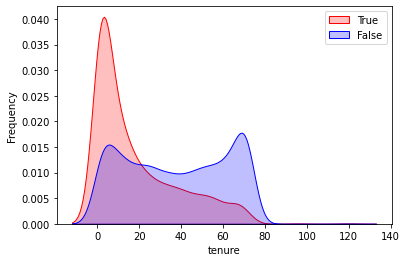

In [ ]:
tenure = sns.kdeplot(df['tenure'][(df['churn'] == True)], color = 'Red', shade = True)
tenure = sns.kdeplot(df['tenure'][(df['churn'] == False)], ax = tenure, color = 'Blue', shade = True)
tenure.set_xlabel('tenure')
tenure.set_ylabel('Frequency')
plt.legend([True, False])

Pelanggan yang churn sebagian besar telah menetap di perusahaan paling tidak sekitar 0-20 bulan. Jika dibandingkan dengan pelanggan yang tidak churn, pelanggan yang churn termasuk orang-orang yang baru bergabung kedalam perusahaan

##Apa jenis internet yang digunakan oleh pelanggan yang churn?

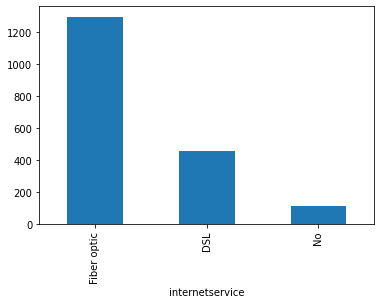

In [ ]:
df[df['churn'] == 1].groupby('internetservice')['customerid'].count().sort_values(ascending = False).plot(kind = 'bar')

Sebagian besar pelanggan yang churn itu menggunakan fiber optic untuk internet service

##Apa jenis pembayaran yang dilakukan oleh pelanggan yang churn?

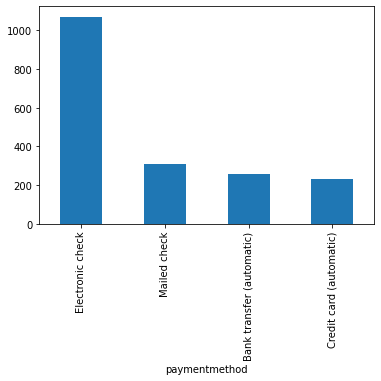

In [ ]:
df[df['churn'] == 1].groupby('paymentmethod')['customerid'].count().sort_values(ascending = False).plot(kind = 'bar')

Electronic check lebih dominan digunakan oleh pelanggan yang churn

##Region mana yang sering terjadi churn?

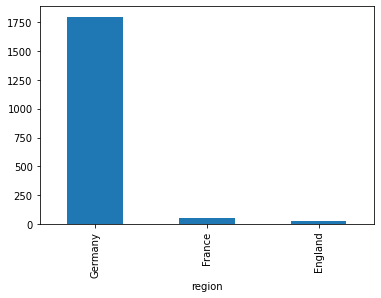

In [ ]:
df[df['churn'] == 1].groupby('region')['customerid'].count().sort_values(ascending = False).plot(kind = 'bar')

Customer yang berasal dari Jerman yang paling banyak melakukan churn

#Encoding Variabel for All Categorical Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
id_col = ['costumerid']
target_col = ['churn']
#separate between categorical columns and numerical columns
cat_cols = df.nunique()[df.nunique() < 5].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in df.columns if x not in cat_cols + target_col + id_col]
#binnary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()
#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]
#encoding binary columns
le = LabelEncoder()
for i in bin_cols:
  df[i] = le.fit_transform(df[i])
#encoding multinomial columns
df = pd.get_dummies(data = df, columns = multi_cols)


Let's check encoding data

In [ ]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,...,region_England,region_France,region_Germany,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,2424-WVHPL,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,3679-XASPY,0,0,1,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,2967-MXRAV,1,0,1,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,8992-CEUEN,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,9318-NKNFC,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerid                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   seniorcitizen                            7043 non-null   int64  
 3   partner                                  7043 non-null   int64  
 4   dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   phoneservice                             7043 non-null   int64  
 7   multiplelines                            7043 non-null   int64  
 8   onlinesecurity                           7043 non-null   int64  
 9   onlinebackup                             7043 non-null   int64  
 10  deviceprotection                         7043 no

#EDA

In [ ]:
df[num_cols].describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.401107,64.751874,2292.875264
std,24.606849,30.097858,2315.221897
min,1.000000,12.000000,12.000000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3793.050000
max,120.000000,118.750000,22345.600000


Insight :
* total charges, monthly charges, and tenure has a skewed distribution
* senior citizen has roughly symetrical distribuition
* min and max all column seemed reasonable 

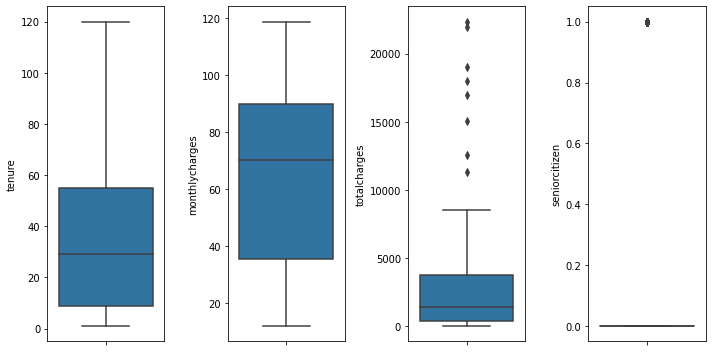

In [ ]:
num = ['tenure', 'monthlycharges', 'totalcharges', 'seniorcitizen']
plt.figure(figsize = (10, 5))
for i in range (len(num)):
  plt.subplot(1, len(num), i+1)
  sns.boxplot(y = df[num[i]])
  plt.tight_layout()

* totalcharges has outlier, but still normal
* seniorcitizen, isn't outlier cause seniorcitizen just has 1 or 0 value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

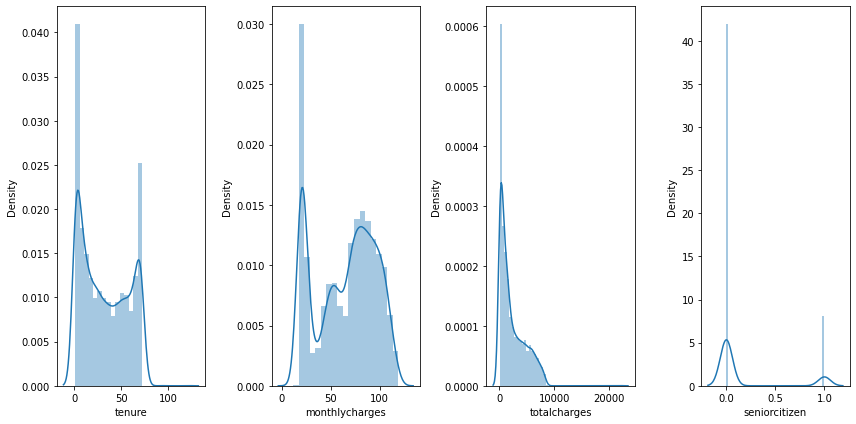

In [ ]:
plt.figure(figsize = (12, 6))
for i in range (len(num_cols)):
  plt.subplot(1, len(num_cols), i+1)
  sns.distplot(df[num[i]])
  plt.tight_layout()

* totalcharges has positive skewed distribution
* seniorcitizen seemed like normal distribution

##Univariate analysis

Text(0.5, 1.0, 'Percent of Churn')

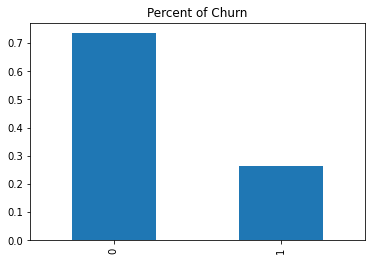

In [ ]:
df['churn'].value_counts(True).plot(kind = 'bar')
plt.title('Percent of Churn')

Text(0.5, 1.0, 'Percent of Churn')

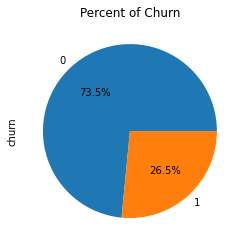

In [ ]:
df['churn'].value_counts(True).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Percent of Churn')

About 26.5% costumer churn, and 73.5% costumer no churn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerid                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   seniorcitizen                            7043 non-null   int64  
 3   partner                                  7043 non-null   int64  
 4   dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   phoneservice                             7043 non-null   int64  
 7   multiplelines                            7043 non-null   int64  
 8   onlinesecurity                           7043 non-null   int64  
 9   onlinebackup                             7043 non-null   int64  
 10  deviceprotection                         7043 no

##Bivariate Analysis

In [ ]:
target = ['churn']
table = df.nunique()[(df.nunique() == 2)].keys().tolist()
table = [x for x in table if x not in target]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


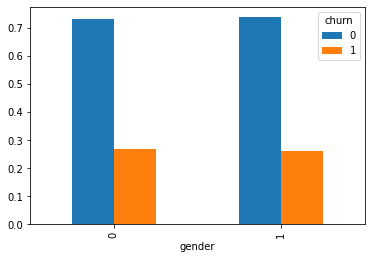

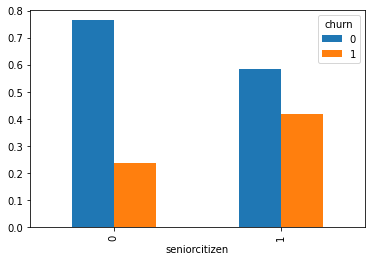

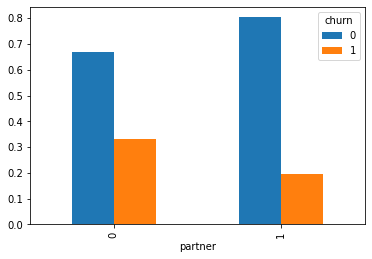

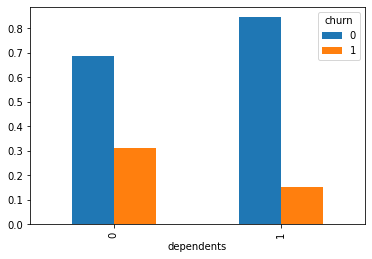

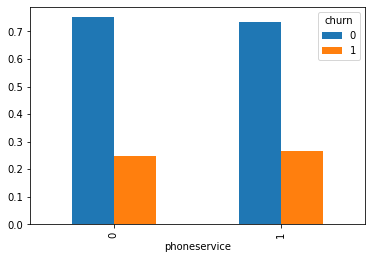

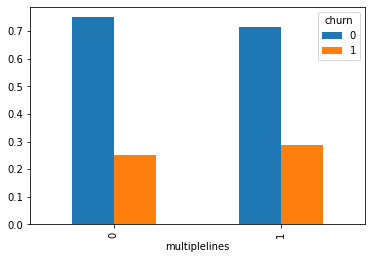

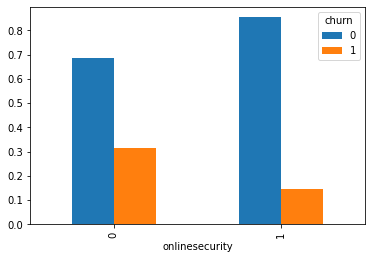

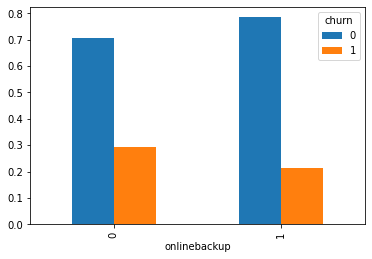

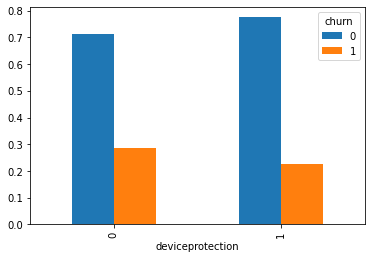

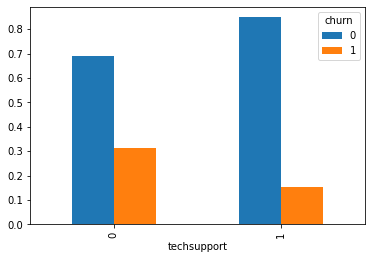

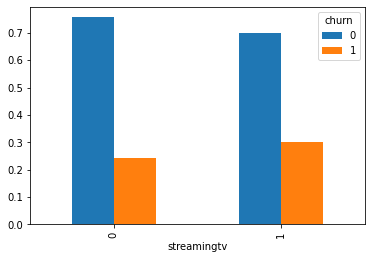

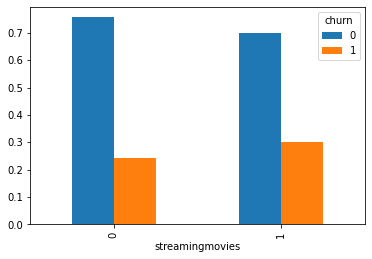

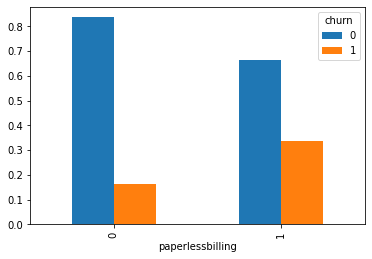

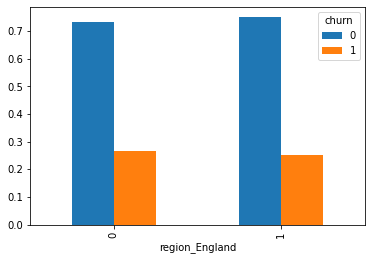

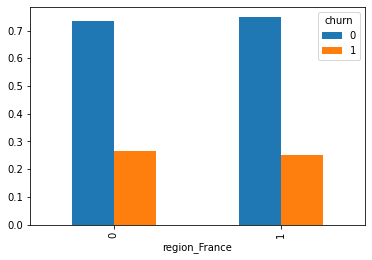

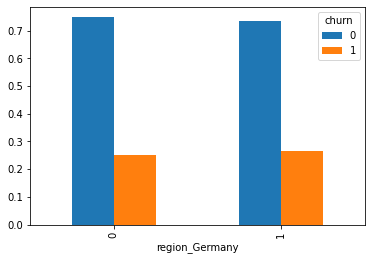

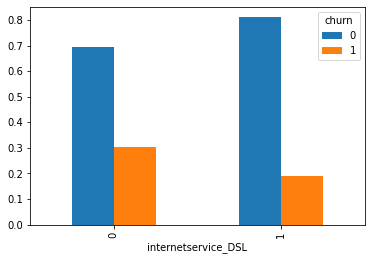

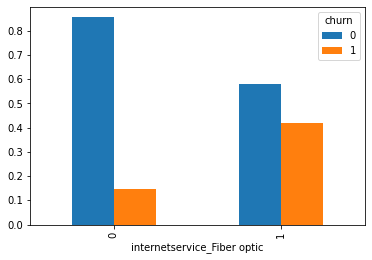

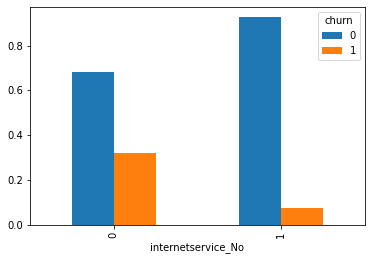

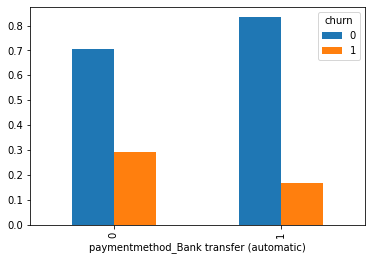

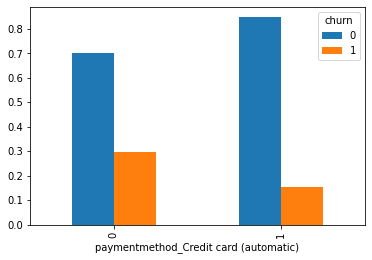

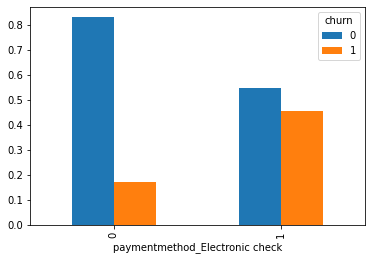

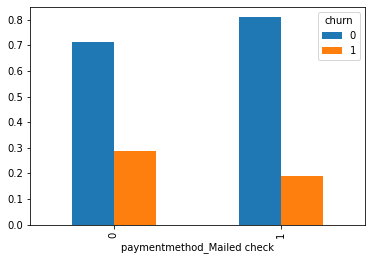

In [ ]:
for i in range(len(table)):
  table_1 = pd.crosstab(df[table[i]], df['churn'])
  table_1.div(table_1.sum(1).astype(float), axis = 0).plot(kind = 'bar')

In [ ]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,...,region_England,region_France,region_Germany,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,2424-WVHPL,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,3679-XASPY,0,0,1,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,2967-MXRAV,1,0,1,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,8992-CEUEN,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,9318-NKNFC,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


* Customer yang seniorcitizennya 1 itu cenderung tingkat churnnya tinggi
* Customer yang tidak memiliki partner memiliki tingkat churn tinggi
* Onlinesecurity nya 1 itu peluang churn nya kecil, dan yang tidak memiliki onlinesecurity peluangnya churn tinggi
* techsupport 0, memiliki churn yang lebih tinggi, dan sebaliknya
* Costumer yang Peperlessbillingnya 1 itu churnnya tinggi dibanding yang tidak
* orang yang menggunakan internetserive jenis fiber optik cenderung berpotensi melakukan churn
* orang yang tidak memiliki internetservice itu cenderung tidak akan churn
* banyak costumer yang melakukan churn itu payment methodnya adalah electronic check

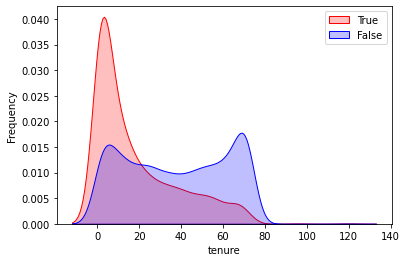

In [ ]:
tenure = sns.kdeplot(df['tenure'][(df['churn'] == True)], color = 'Red', shade = True)
tenure = sns.kdeplot(df['tenure'][(df['churn'] == False)], ax = tenure, color = 'Blue', shade = True)
tenure.set_xlabel('tenure')
tenure.set_ylabel('Frequency')
plt.legend([True, False])

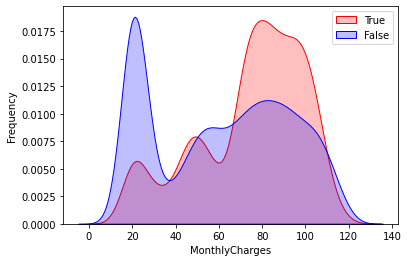

In [ ]:
mc = sns.kdeplot(df['monthlycharges'][(df['churn'] == True)], color = 'Red', shade = True)
mc = sns.kdeplot(df['monthlycharges'][(df['churn'] == False)], ax = mc, color = 'Blue', shade = True)
mc.set_xlabel('MonthlyCharges')
mc.set_ylabel('Frequency')
plt.legend([True, False])

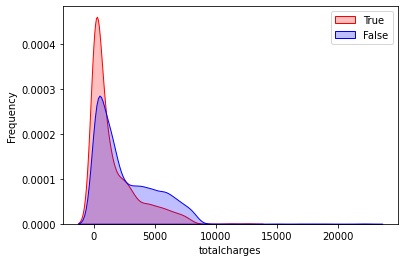

In [ ]:
tc = sns.kdeplot(df['totalcharges'][(df['churn'] == True)], color = 'Red', shade = True)
tc = sns.kdeplot(df['totalcharges'][(df['churn'] == False)], ax = tc, color = 'Blue', shade = True)
tc.set_xlabel('totalcharges')
tc.set_ylabel('Frequency')
plt.legend([True, False])

##Multivariate analysis

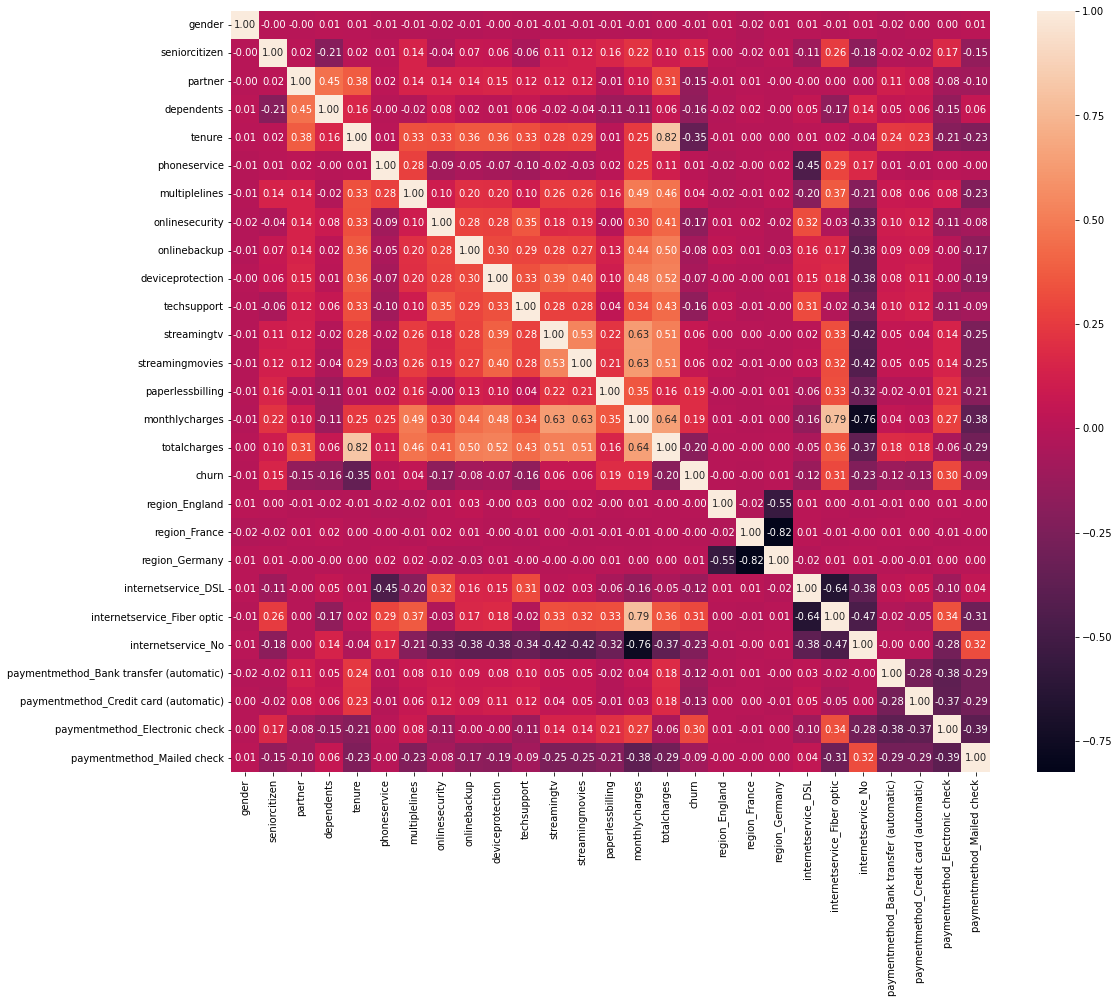

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (17, 14))
sns.heatmap(df_corr, annot = True, annot_kws = {'size':10} ,fmt = '.2f')

* many people who use fiber optic have a big monthlycharge
* The longer the customer stays with the company, the bigger the total charges he gets
* semakin besar charge yang costumer dapatkan setiap bulannya, semakin besar juga total charge keseluruhan yang dia dapatkan
* semakin sering costumer menggunakan streaming tv dan streaming movie, semakin besar biaya bulanan yang dibebankan

#Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from imblearn import under_sampling, over_sampling
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
rs = 42

In [ ]:
df = df.drop(['customerid'], axis = 1)

In [ ]:
sm = over_sampling.SMOTE(random_state = 42)

In [ ]:
x = df.drop(['churn'], axis = 1)
y = df['churn']

In [ ]:
x_sm, y_sm = sm.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = rs)

##Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = rs)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.3867739966291637


In [ ]:
y_train

3520     0
5262     1
10333    1
4058     0
7089     1
        ..
5734     0
5191     0
5390     0
860      0
7270     1
Name: churn, Length: 7761, dtype: int64

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train, y_train)

In [ ]:
#rf_random.best_params_

In [ ]:
rf = RandomForestClassifier(random_state = rs, bootstrap = False, max_depth = 40, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print(accuracy_score(y_test, y_pred))

RMSE 0.38275545648176407
0.8534982605334364


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred, labels = [1,0])
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.85      0.85      1304
           0       0.85      0.85      0.85      1283

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



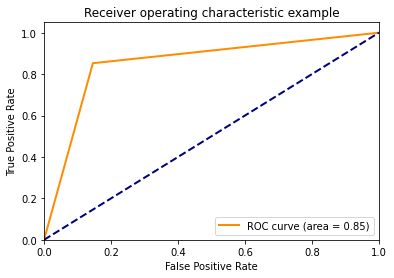

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


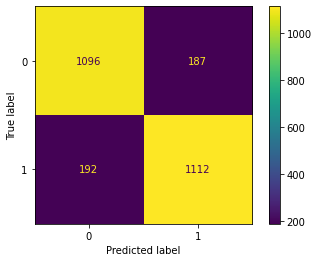

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, x_test, y_test)
plt.show()

##KNN

In [ ]:
kn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 180, n_neighbors = 50, p = 12, weights = 'distance')

In [ ]:
kn.fit(x_train, y_train)
y_kn = kn.predict(x_test)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_kn)))

RMSE 0.4681589334958621


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_kn, labels = [1,0])
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.83      0.79      1304
           0       0.81      0.73      0.77      1283

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


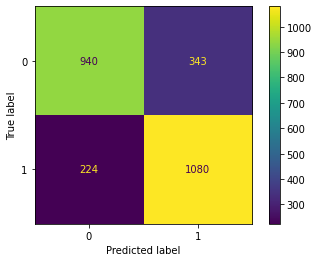

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn, x_test, y_test)
plt.show()

##GradienBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xgb = GradientBoostingClassifier(loss = 'exponential')

In [ ]:
xgb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
xgb.fit(x_train, y_train)
y_gb = xgb.predict(x_test)
print('RMSE', np.sqrt(mean_squared_error(y_test, y_gb)))


RMSE 0.39810140837361147


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_gb, labels = [1,0])
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.86      0.85      1304
           0       0.85      0.82      0.84      1283

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


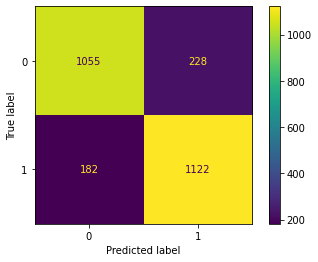

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, x_test, y_test)
plt.show()